In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC


In [2]:
dataset_dir = "/Users/MA_Arash/MA_git/EIT_Thigh_Force_Estimation/Data"
npz_files = [f for f in os.listdir(dataset_dir) if f.endswith('.npz')]
len(npz_files)

18635

## Classification between three classes [Low, Medium, High forces] 

In [3]:
## [20-40] --> Low
## [40-60] --> Medium
## [60-80] --> High
def categorize_target_force(target_force):
    if target_force <= 40:
        return 0  # Small
    elif target_force <= 60:
        return 1  # Middle
    else:
        return 2  # High

### Extract the data from `.npz` files

In [5]:
X = list()
y = list()

for file in npz_files:
    file_path = os.path.join(dataset_dir, file)
    data = np.load(file_path)
    
    eit_data = data['eit']
    target_force = data['target_force']
    
    # flatten the eit data
    eit_data_flat = eit_data.reshape(-1)
    
    X.append(eit_data_flat)
    y.append(categorize_target_force(target_force))

X = np.array(X)
y = np.array(y)

print(f"Loaded {len(X)} samples, each with {X.shape[1]} features")


Loaded 18635 samples, each with 256 features


SVM Accuracy: 0.97


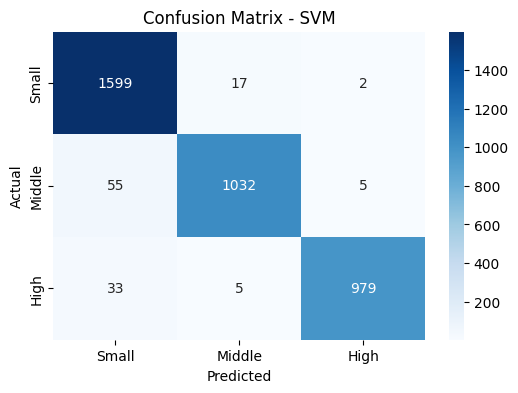

              precision    recall  f1-score   support

       Small       0.95      0.99      0.97      1618
      Middle       0.98      0.95      0.96      1092
        High       0.99      0.96      0.98      1017

    accuracy                           0.97      3727
   macro avg       0.97      0.97      0.97      3727
weighted avg       0.97      0.97      0.97      3727



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize random forest

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Initialize and train SVM
svm_model = SVC(kernel='linear')  # Linear kernel SVM
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Small", "Middle", "High"], yticklabels=["Small", "Middle", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# classification report
print(classification_report(y_test, y_pred_svm, target_names=["Small", "Middle", "High"]))

Random Forest Accuracy: 1.00


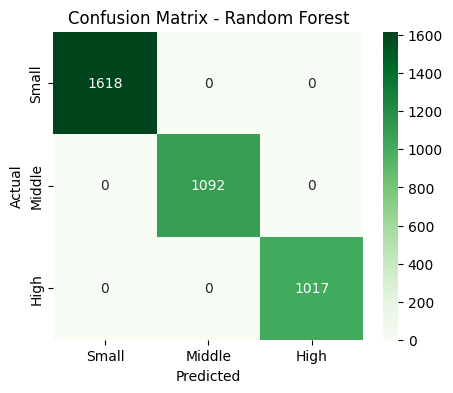

              precision    recall  f1-score   support

       Small       1.00      1.00      1.00      1618
      Middle       1.00      1.00      1.00      1092
        High       1.00      1.00      1.00      1017

    accuracy                           1.00      3727
   macro avg       1.00      1.00      1.00      3727
weighted avg       1.00      1.00      1.00      3727



In [15]:
## Random Forest classification

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Small", "Middle", "High"], yticklabels=["Small", "Middle", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

print(classification_report(y_test, y_pred_rf, target_names=["Small", "Middle", "High"]))

In [ ]:
from sklearn.decomposition import PCA

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA to reduce features to 2D for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train on the original data

# Create a meshgrid to visualize the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid
Z = rf_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["red", "blue", "green"]))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k', cmap=ListedColormap(["red", "blue", "green"]))
plt.title("Random Forest Decision Boundaries (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()